In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../web-app/

/Users/dorislee/Desktop/Fall2016/Research/seg/crowd-seg/web-app


In [3]:
%load_ext autoreload
%autoreload 2
from analysis_toolbox import *

In [4]:
import ast
import matplotlib.image as mpimg

In [5]:
save_db_as_csv()

In [6]:
img_info,object_tbl,bb_info,hit_info = load_info()

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  ParserWarning)


For the work quality evaluation methods, given a list of x_locs and y_locs of all of the worker's bounding boxes and sizes of the image, for the same object, return what should be "best region" and confidence score 

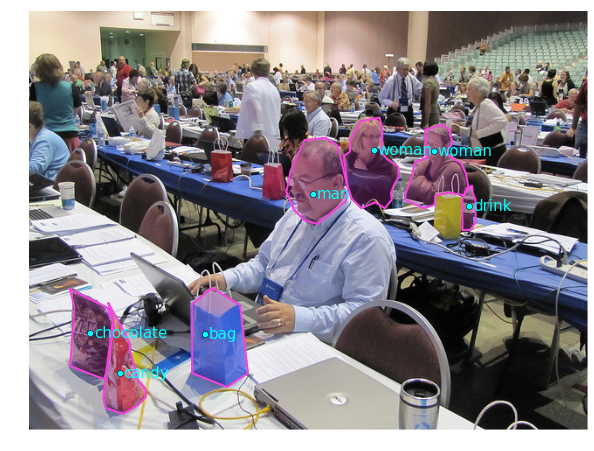

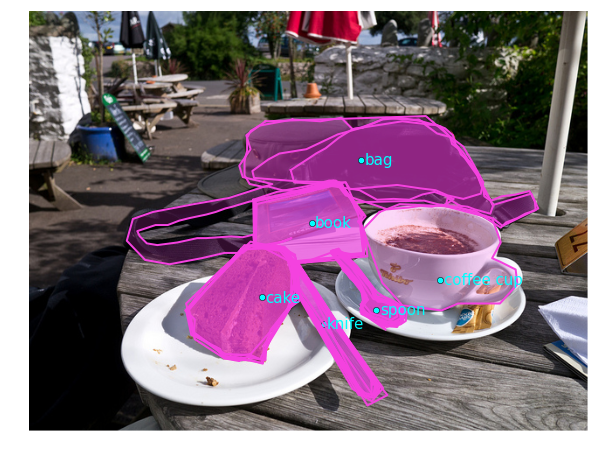

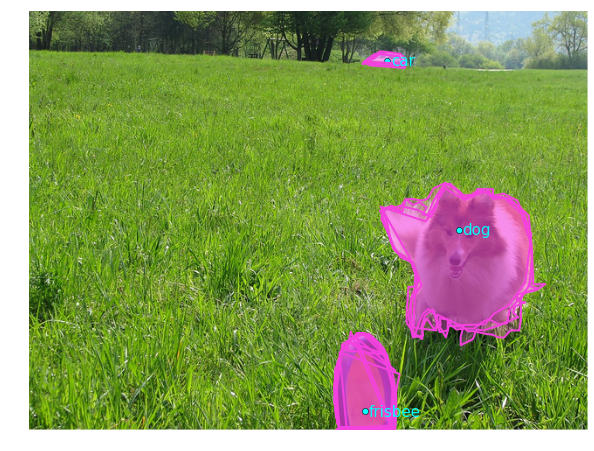

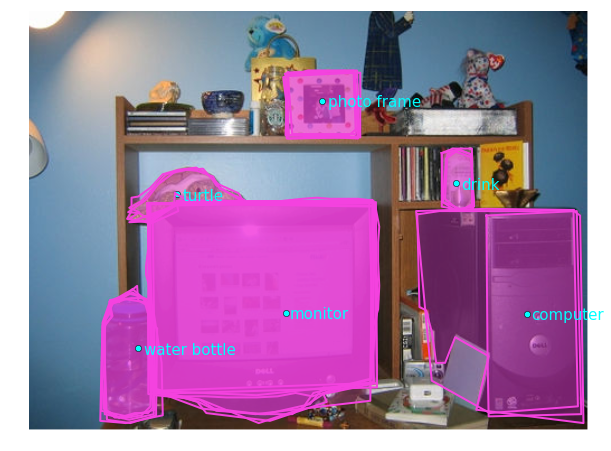

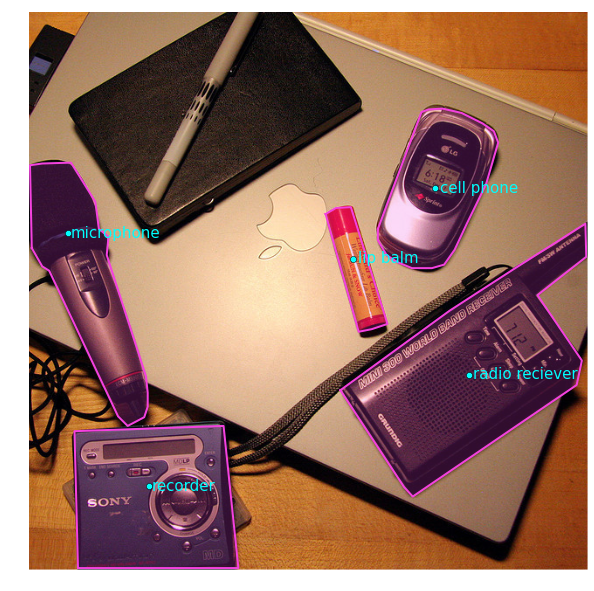

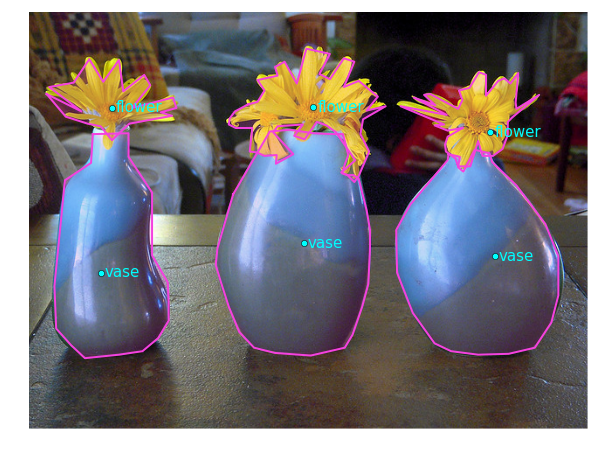

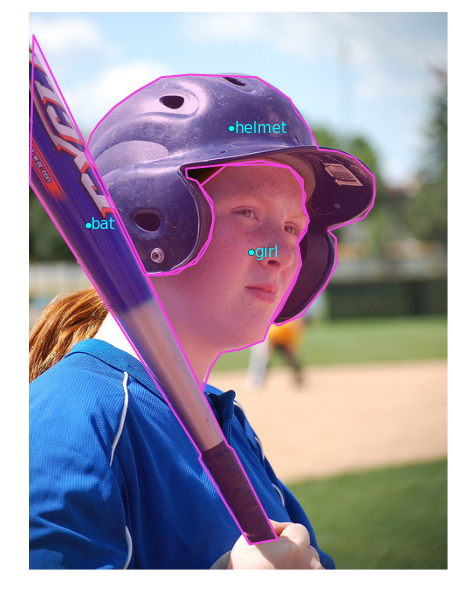

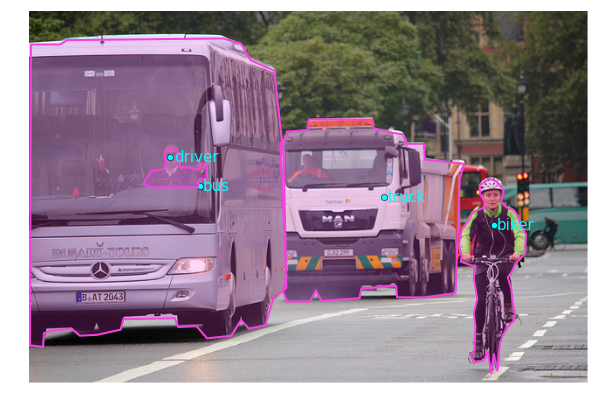

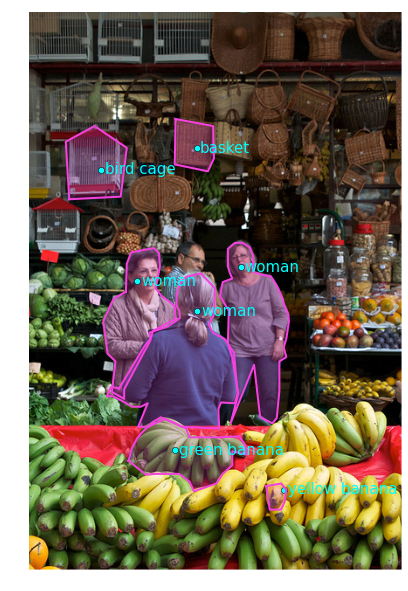

In [24]:
all_x_locs = {}
all_y_locs = {}
for i in np.arange(len(img_info)):
    img_name = img_info["filename"][i]
#     print img_name
    if 'COCO' in img_name:
        fname = "app/static/"+img_name+".png"
#         print fname
        img=mpimg.imread(fname)
        width,height = get_size(fname)
        plt.figure(figsize =(10,10))
        plt.imshow(img)
        plt.axis("off")
        filtered_object_tbl = object_tbl[object_tbl["image_id"]==i+1]
        plt.plot(filtered_object_tbl["x_loc"],filtered_object_tbl["y_loc"],'o',color="cyan")
        for name, x,y in zip(filtered_object_tbl["name"],filtered_object_tbl["x_loc"],filtered_object_tbl["y_loc"]):
            plt.text(x+5,y+5,name, fontsize=15,color='cyan')
        #Draw Collected Bounding Boxes
        for oid,bbx_path,bby_path in zip(bb_info["object_id"],bb_info["x_locs"],bb_info["y_locs"]):
            if int(object_tbl[object_tbl.object_id==oid].image_id) ==i+1:
                objid = int(object_tbl[object_tbl.object_id==oid].object_id)
                x_locs = ast.literal_eval(bbx_path)
                y_locs = ast.literal_eval(bby_path)
                # Append the starting point again in the end to close the BB
                x_locs.append(x_locs[0])
                y_locs.append(y_locs[0])
                if objid in all_x_locs.keys():
                    all_x_locs[objid].append(x_locs)
                    all_y_locs[objid].append(y_locs)                    
                else:
                    all_x_locs[objid]=[x_locs]
                    all_y_locs[objid]=[y_locs]
                plt.plot(x_locs,y_locs,'-',color="#f442df",linewidth=2)
                plt.fill_between(x_locs,y_locs,  color="none",facecolor='#f442df', alpha=0.2)
        plt.xlim(0,width)
        plt.ylim(height,0)